In [1]:
from sklearn.datasets import load_iris, load_wine
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt


데이터 로드

In [2]:
iris = load_iris()
iris_df = pd.DataFrame(iris['data'],columns=iris['feature_names']) # iris['data'] 특성데이터
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## 3차원까지만 시각화가 가능하다.
sl,sw,pl 3개만 시각화

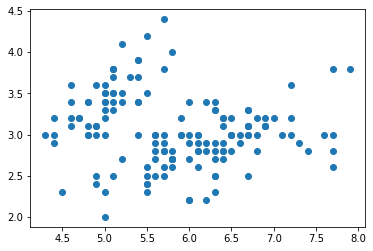

In [3]:
plt.scatter(iris_df['sepal length (cm)'], iris_df['sepal width (cm)'])
plt.show()

컬러

In [4]:
color=[]
for n in iris.target:
    if n==0:
        color.append('r') # target = 0
    elif n==1:
        color.append('g') # target = 1
    else:
        color.append('b') 

3차원데이터

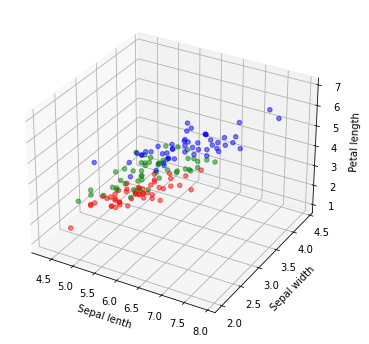

In [5]:
fig = plt.figure(figsize=(10,6))
ax = fig.gca(projection='3d' ) # 창을 담당. 3개. 
ax.scatter(iris_df['sepal length (cm)'],iris_df['sepal width (cm)'],
           iris_df['petal length (cm)'],  alpha=0.5,c=color) # x1, x2, y # alpha 투명도
ax.set_xlabel('Sepal lenth')
ax.set_ylabel('Sepal width')
ax.set_zlabel('Petal length')
plt.show()

# 차원축소하게되면 전체 시각화도 가능하고, 학습할 때 빨리 학습할 수 있음.

## 차원축소 PCA, model.fit_transform()

목적
1)  이 전체 특성데이터 분포가 어떻게 되어있는지 시각화 하는것.
2) 컬럼의 개수가 너무 많다. 학습하는데 더딤. 차원을 축소해서 예측값은 transform을 해서 분류값을 가질 수 있따.

In [6]:
model.transform([[3,2,1,2]])

NameError: name 'model' is not defined

In [7]:
model = PCA(n_components=2) # 2차원으로 차원을 축소
pcaf = model.fit_transform(iris_df) # 4차원 -> 2차원 ndarray 반환.

In [8]:
pcaf.shape # 원래 150x4  -> 150x2

(150, 2)

scatter

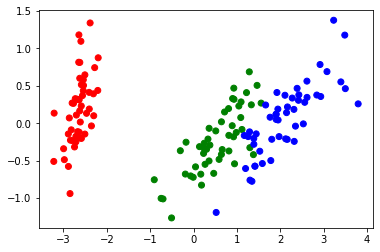

In [9]:
plt.scatter(pcaf[:,0], pcaf[:,1], c=color)
plt.show()

---
## 연습문제
 wine 데이터셋을 2차원으로 차원축소후 분류를 확인하시요..


In [5]:
wine = load_wine()

In [17]:
wine_df = pd.DataFrame(wine['data'],columns=wine['feature_names'])
wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [13]:
color=[]
for n in wine.target:
    if n==0:
        color.append('r') # target = 0
    elif n==1:
        color.append('g') # target = 1
    else:
        color.append('b') 
    

In [10]:
model = PCA(n_components=2)
pcaf = model.fit_transform(wine_df)

In [11]:
pcaf.shape

(178, 2)

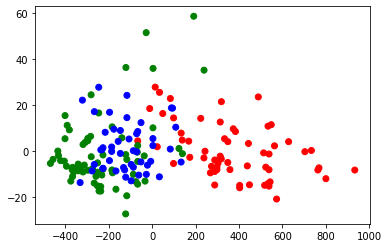

In [14]:
plt.scatter(pcaf[:,0], pcaf[:,1], c=color)
plt.show()

In [ ]:
# 초록색 파란색이 CM 오분류로 잘남.
# 초록색 데이터 이상치가 나있음.
# VIF로 빼고
# 상관관계 낮은 거 뺴고 .. 등등
# 데이터 품질 관련해서 할 수 있는 게 저 2개밖에 없다.

역분류

In [18]:
model.inverse_transform([[400,16]])

array([[1.36835784e+01, 2.09842180e+00, 2.51797823e+00, 1.80496299e+01,
        1.22878283e+02, 2.70509163e+00, 2.65535537e+00, 2.90947605e-01,
        1.91121240e+00, 6.23055281e+00, 1.01379868e+00, 2.83773222e+00,
        1.14653805e+03]])